In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
def load_data():
  train_df = pd.read_csv('train.csv')
  test_df = pd.read_csv('test.csv')
  return train_df, test_df

# 1.Load Data

In [3]:
train_df, test_df = load_data()

In [4]:
carkaidee = pd.concat([train_df, test_df], axis=0)

In [5]:
carkaidee.shape

(8879, 13)

## train_df data wrangling

In [6]:
carkaidee.isnull().sum()

price              0
desc             214
ad_id              0
location           0
timestamp          0
mileage         2078
brand              0
model              0
year               0
fuel               0
transmission     267
color            324
car_type           0
dtype: int64

In [7]:
carkaidee.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8879 entries, 0 to 1775
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   price         8879 non-null   int64 
 1   desc          8665 non-null   object
 2   ad_id         8879 non-null   int64 
 3   location      8879 non-null   object
 4   timestamp     8879 non-null   int64 
 5   mileage       6801 non-null   object
 6   brand         8879 non-null   object
 7   model         8879 non-null   object
 8   year          8879 non-null   int64 
 9   fuel          8879 non-null   object
 10  transmission  8612 non-null   object
 11  color         8555 non-null   object
 12  car_type      8879 non-null   object
dtypes: int64(4), object(9)
memory usage: 971.1+ KB


## convert all non numeric in mileage 

In [8]:
carkaidee['mileage'] = pd.to_numeric(carkaidee.mileage, errors = 'coerce')
carkaidee.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8879 entries, 0 to 1775
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         8879 non-null   int64  
 1   desc          8665 non-null   object 
 2   ad_id         8879 non-null   int64  
 3   location      8879 non-null   object 
 4   timestamp     8879 non-null   int64  
 5   mileage       6796 non-null   float64
 6   brand         8879 non-null   object 
 7   model         8879 non-null   object 
 8   year          8879 non-null   int64  
 9   fuel          8879 non-null   object 
 10  transmission  8612 non-null   object 
 11  color         8555 non-null   object 
 12  car_type      8879 non-null   object 
dtypes: float64(1), int64(4), object(8)
memory usage: 971.1+ KB


In [9]:
carkaidee.describe().round(3)

,price,ad_id,timestamp,mileage,year
count,8.879000e+03,8.879000e+03,8.879000e+03,6.796000e+03,8879.000
mean,5.549796e+05,3.549939e+08,1.587364e+09,1.470196e+05,2011.808
std,7.556894e+05,6.434564e+06,7.123863e+06,1.932636e+06,6.023
min,9.990000e+02,1.313805e+08,1.493269e+09,0.000000e+00,1956.000
25%,2.590000e+05,3.548677e+08,1.586933e+09,5.500000e+04,2010.000
50%,3.790000e+05,3.557181e+08,1.589459e+09,1.000000e+05,2013.000
75%,5.690000e+05,3.561931e+08,1.590916e+09,1.528590e+05,2016.000
max,2.190000e+07,3.562432e+08,1.591088e+09,1.234568e+08,2020.000


## check outlier in price and mileage

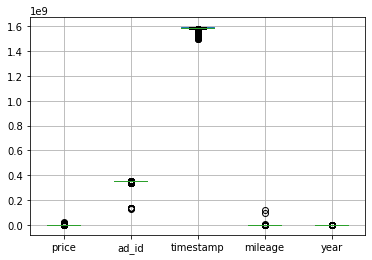

In [10]:
carkaidee.boxplot()

In [11]:
carkaidee = carkaidee.drop(['desc','ad_id','timestamp'], axis=1)

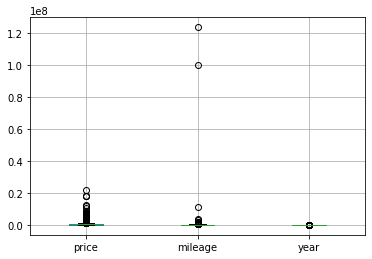

In [12]:
carkaidee.boxplot(column=['price', 'mileage', 'year'])

In [13]:
carkaidee = carkaidee[(carkaidee.price > carkaidee.price.quantile(0.001)) & (carkaidee.price < carkaidee.price.quantile(0.96))]

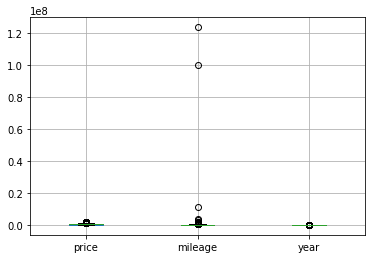

In [14]:
# carkaidee.boxplot(column=['price', 'mileage', 'year'])
carkaidee.boxplot()

## clean out over 500,000 km mileage

In [15]:
carkaidee.mileage[carkaidee.mileage>500000] = np.nan

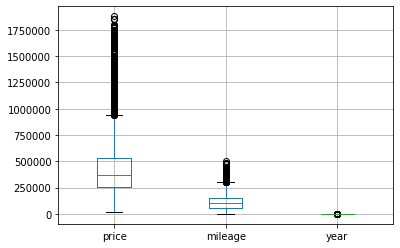

In [16]:
carkaidee.boxplot()

## fill missing data in train_df 

In [17]:
def clean_data(df):
  for col in df.columns:
    mode = df[col].mode()[0]
    df[col] = df[col].fillna(mode)
  return df

In [18]:
clean = clean_data(carkaidee.copy())

# category data set

In [19]:
clean.car_type = clean.car_type.astype('category')
clean.transmission = clean.transmission.astype('category')
clean.fuel = clean.fuel.astype('category')

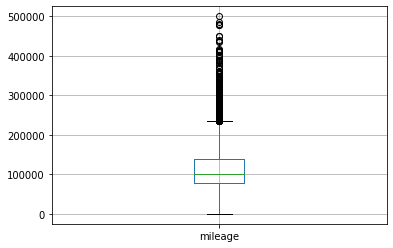

In [20]:
clean.boxplot('mileage')

In [21]:
display(clean.sample(5))

,price,location,mileage,brand,model,year,fuel,transmission,color,car_type
1668,98000,ชลบุรี,100000.0,Isuzu,Adventure,2001,ดีเซล,เกียร์อัตโนมัติ,บรอนซ์ทอง,รถ MPV / SUV
2991,319000,กรุงเทพมหานคร,85000.0,Toyota,Vios,2015,เบนซิน,เกียร์อัตโนมัติ,ขาว,รถเก๋ง
1791,485000,ยะลา,89100.0,Toyota,Hilux Vigo Champ,2014,ดีเซล,เกียร์ธรรมดา,ดำ,รถกระบะ
5283,849000,กรุงเทพมหานคร,70000.0,Mini,COOPER,2012,เบนซิน,เกียร์อัตโนมัติ,ขาว,รถเก๋ง
4485,269000,นครปฐม,155000.0,Honda,City,2013,เบนซิน + LPG,เกียร์อัตโนมัติ,น้ำตาล,รถเก๋ง


# Add car_age dataset

In [22]:
clean['car_age'] = 2020 - clean.year

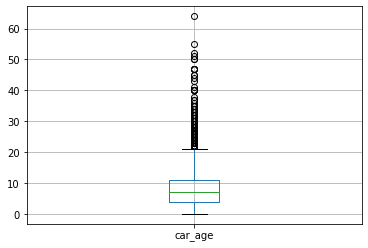

In [23]:
clean.boxplot('car_age')

In [24]:
clean.loc[clean['car_age']>50].sort_values(by='car_age', ascending = False)

,price,location,mileage,brand,model,year,fuel,transmission,color,car_type,car_age
135,89000,กาฬสินธุ์,34567.0,Toyota,Hilux Mighty-X,1956,ดีเซล,เกียร์ธรรมดา,น้ำเงิน,รถกระบะ,64
1,1150000,กรุงเทพมหานคร,1234.0,Chevrolet,รุ่นอื่นๆ,1965,เบนซิน,เกียร์อัตโนมัติ,แดง,รถอื่น ๆ,55
4522,139000,กรุงเทพมหานคร,100000.0,Jeep,Willy,1968,เบนซิน,เกียร์ธรรมดา,เขียว,รถ MPV / SUV,52
636,285000,เชียงราย,200000.0,Jeep,Willy,1969,เบนซิน,เกียร์อัตโนมัติ,ขาว,รถ MPV / SUV,51


In [25]:
clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8512 entries, 0 to 1775
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   price         8512 non-null   int64   
 1   location      8512 non-null   object  
 2   mileage       8512 non-null   float64 
 3   brand         8512 non-null   object  
 4   model         8512 non-null   object  
 5   year          8512 non-null   int64   
 6   fuel          8512 non-null   category
 7   transmission  8512 non-null   category
 8   color         8512 non-null   object  
 9   car_type      8512 non-null   category
 10  car_age       8512 non-null   int64   
dtypes: category(3), float64(1), int64(3), object(4)
memory usage: 624.1+ KB


# 3.Extract feature

In [26]:
clean.head()

,price,location,mileage,brand,model,year,fuel,transmission,color,car_type,car_age
0,569000,กรุงเทพมหานคร,5700.0,Mazda,Mazda2 Sport,2020,เบนซิน,เกียร์อัตโนมัติ,เทา,รถเก๋ง,0
1,1150000,กรุงเทพมหานคร,1234.0,Chevrolet,รุ่นอื่นๆ,1965,เบนซิน,เกียร์อัตโนมัติ,แดง,รถอื่น ๆ,55
2,799000,นนทบุรี,100000.0,Mitsubishi,Pajero Sport,2016,ดีเซล,เกียร์อัตโนมัติ,ขาว,รถ MPV / SUV,4
3,429000,กรุงเทพมหานคร,184921.0,Toyota,Camry,2010,ไฮบริด,เกียร์อัตโนมัติ,ดำ,รถเก๋ง,10
4,268000,กรุงเทพมหานคร,103000.0,Nissan,Almera,2016,เบนซิน,เกียร์อัตโนมัติ,ขาว,รถเก๋ง,4


In [27]:
dummy = pd.get_dummies(clean[['location','brand','model', 'color','fuel', 'transmission', 'car_type']])
clean1 = pd.concat([clean.copy(), dummy], axis=1)
clean1 = clean1._get_numeric_data()

In [28]:
clean1.head()

,price,mileage,year,car_age,location_กระบี่,location_กรุงเทพมหานคร,location_กาญจนบุรี,location_กาฬสินธุ์,location_กำแพงเพชร,location_ขอนแก่น,...,fuel_เบนซิน + LPG,fuel_เบนซิน + NGV,fuel_ไฮบริด,transmission_เกียร์ธรรมดา,transmission_เกียร์อัตโนมัติ,car_type_รถ MPV / SUV,car_type_รถกระบะ,car_type_รถตู้,car_type_รถอื่น ๆ,car_type_รถเก๋ง
0,569000,5700.0,2020,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,1150000,1234.0,1965,55,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,799000,100000.0,2016,4,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
3,429000,184921.0,2010,10,0,1,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
4,268000,103000.0,2016,4,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1


In [29]:
clean1.columns

Index(['price', 'mileage', 'year', 'car_age', 'location_กระบี่',
       'location_กรุงเทพมหานคร', 'location_กาญจนบุรี', 'location_กาฬสินธุ์',
       'location_กำแพงเพชร', 'location_ขอนแก่น',
       ...
       'fuel_เบนซิน + LPG', 'fuel_เบนซิน + NGV', 'fuel_ไฮบริด',
       'transmission_เกียร์ธรรมดา', 'transmission_เกียร์อัตโนมัติ',
       'car_type_รถ MPV / SUV', 'car_type_รถกระบะ', 'car_type_รถตู้',
       'car_type_รถอื่น ๆ', 'car_type_รถเก๋ง'],
      dtype='object', length=431)

In [30]:
clean1.location_กรุงเทพมหานคร

0       1
1       1
2       0
3       1
4       1
       ..
1770    0
1772    1
1773    1
1774    0
1775    1
Name: location_กรุงเทพมหานคร, Length: 8512, dtype: uint8

In [31]:
def split_data_price(df):
  y = df['price']
  X = df.drop('price', axis=1)
  return X, y

In [32]:
X, y = split_data_price(clean1.copy())

In [33]:
print(X.shape)
X.head()

(8512, 430)


,mileage,year,car_age,location_กระบี่,location_กรุงเทพมหานคร,location_กาญจนบุรี,location_กาฬสินธุ์,location_กำแพงเพชร,location_ขอนแก่น,location_จันทบุรี,...,fuel_เบนซิน + LPG,fuel_เบนซิน + NGV,fuel_ไฮบริด,transmission_เกียร์ธรรมดา,transmission_เกียร์อัตโนมัติ,car_type_รถ MPV / SUV,car_type_รถกระบะ,car_type_รถตู้,car_type_รถอื่น ๆ,car_type_รถเก๋ง
0,5700.0,2020,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,1234.0,1965,55,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,100000.0,2016,4,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
3,184921.0,2010,10,0,1,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
4,103000.0,2016,4,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1


In [34]:
print(X.shape)
y.head()

(8512, 430)


0     569000
1    1150000
2     799000
3     429000
4     268000
Name: price, dtype: int64

## create train and test set

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.2, random_state = 42)

# 4.Train model (Regression)

In [36]:
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

In [37]:
# lasso = Lasso(alpha=0.1, normalize = True)
# lasso.fit(train_feat, y_train)

In [38]:
forest = RandomForestRegressor()
forest.fit(X_train, y_train)

RandomForestRegressor()

# Evaluation (Regression) with mean squar error ; mse

In [41]:
y_pred = forest.predict(X_test)

In [48]:
print('R2 :', forest.score(X_test, y_test))

R2 : 0.865309163575489


In [46]:
forest_mse = mean_squared_error(y_test, y_pred)
print('Random forest model MSE  :', forest_mse)

Random forest model MSE  : 12436907461.827703


## Root mean sqaur error

In [44]:
import math
# math.sqrt(mean_squared_error(y_test, y_pred))
math.sqrt(12372584834.772602)

111232.12141630943